In [17]:
%matplotlib inline

from __future__ import print_function
from wordcloud import create_cloud
try:
    from gensim import corpora, models, matutils
except:
    print("import gensim failed.")
    print()
    print("Please install it")
    raise

import matplotlib.pyplot as plt
import numpy as np
from os import path

In [18]:
NUM_TOPICS = 100

# Check that data exists
if not path.exists('./data/ap/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

# Load the data
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

# Build the topic model
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

In [25]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(5, 0.065346307801313341), (8, 0.062163673908854737), (16, 0.030540319903267429), (19, 0.01470630762534903), (36, 0.068784615936843346), (40, 0.34992886780113791), (42, 0.056889025845844009), (44, 0.059443554269874098), (55, 0.015241051496420981), (82, 0.046396235761258002), (91, 0.029898155522520155), (92, 0.039392592594064954), (97, 0.14377221786720318)]


(array([ 158.,  260.,  389.,  555.,  311.,  261.,  215.,   59.,   26.,   12.]),
 array([  1. ,   3.3,   5.6,   7.9,  10.2,  12.5,  14.8,  17.1,  19.4,
         21.7,  24. ]),
 <a list of 10 Patch objects>)

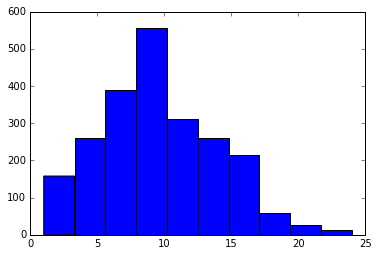

In [30]:
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used)

Could not import pytagcloud. Skipping cloud generation


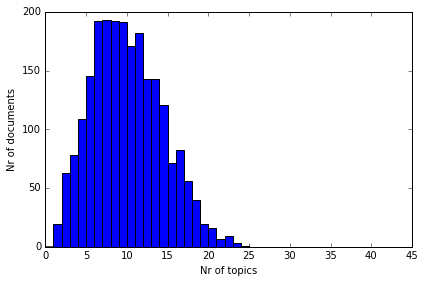

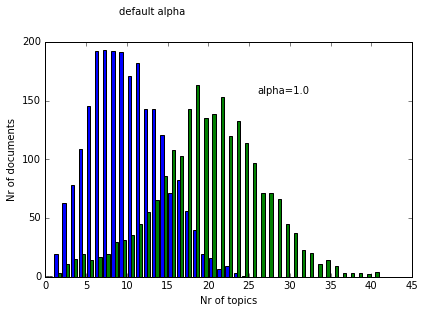

In [34]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()


# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)

# This function will actually check for the presence of pytagcloud and is otherwise a no-op
create_cloud('cloud_blei_lda.png', words)

num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.savefig('Figure_04_01.png')


# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play arousnd with this parameter
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()
fig.savefig('Figure_04_02.png')